# Machine Learning

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [30]:
image_path = '../data/raw/hand_xray.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [31]:
coords = {
    'osso': [
        [200, 250, 250, 300],
        [300, 350, 300, 350],
        [400, 450, 200, 250]
    ],
    'fundo': [
        [50, 100, 50, 100],
        [550, 600, 50, 100],
        [50, 100, 400, 450]
    ]
}

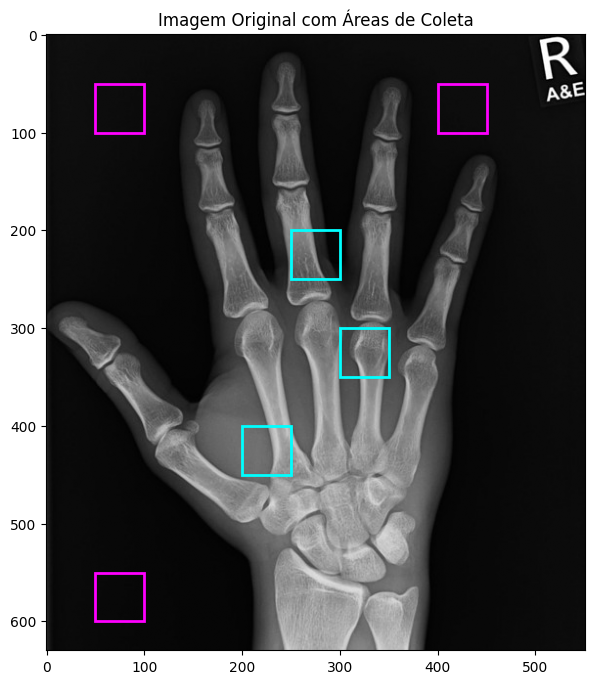

In [32]:
plt.figure(figsize=(10, 8))
plt.imshow(image, cmap='gray')
plt.title('Imagem Original com Áreas de Coleta')

for y1, y2, x1, x2 in coords['osso']:
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='cyan', facecolor='none', lw = 2))

for y1, y2, x1, x2 in coords['fundo']:
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='magenta', facecolor='none', lw = 2))

plt.show()

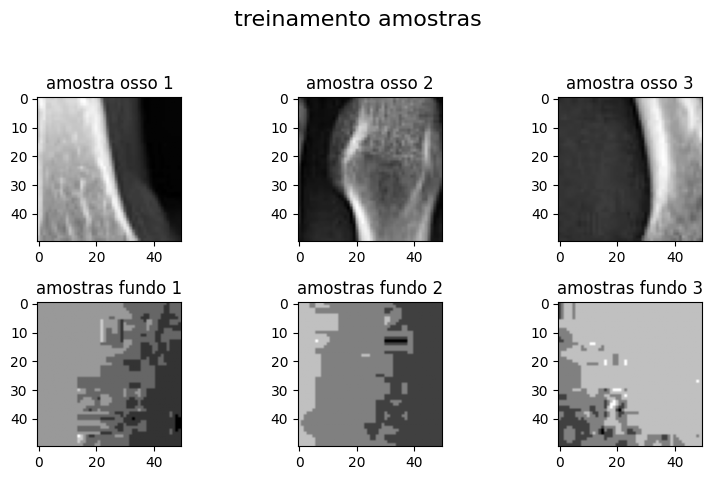

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(8, 5))
fig.suptitle('treinamento amostras', fontsize = 16)

#mostrado amostras do osso
for i, (y1, y2, x1, x2) in enumerate(coords['osso']):
    patch = image[y1:y2, x1:x2]
    axs[0, i].imshow(patch, cmap='gray')
    axs[0, i].set_title(f'amostra osso {i+1}')

#mostrado amostras do fundo
for i, (y1, y2, x1, x2) in enumerate(coords['fundo']):
    patch = image[y1:y2, x1:x2]
    axs[1, i].imshow(patch, cmap='gray')
    axs[1, i].set_title(f'amostras fundo {i+1}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [34]:
features = []
labels = []

In [35]:
for y1, y2, x1, x2 in coords['osso']:
    patch = image[y1:y2, x1:x2]

    #brilho medio
    mean_intensity = np.mean(patch)

    #contraste
    std_intensity = np.std(patch)

    features.append([mean_intensity, std_intensity])
    labels.append(1) #1 = osso

for y1, y2, x1, x2 in coords['fundo']:
    patch = image[y1:y2, x1:x2]

    #brilho medio
    mean_intensity = np.mean(patch)

    #contraste
    std_intensity = np.std(patch)

    features.append([mean_intensity, std_intensity])
    labels.append(0) #0 = fundo

In [36]:
print("Índice | Brilho Médio | Contraste (Std Dev) | Rótulo (1=Osso, 0=Fundo)")
print("-" * 60)
for i, feat in enumerate(features):
    print(f"Amostra {i:02d} | {feat[0]:12.2f} | {feat[1]:19.2f} | {labels[i]}")


Índice | Brilho Médio | Contraste (Std Dev) | Rótulo (1=Osso, 0=Fundo)
------------------------------------------------------------
Amostra 00 |        73.19 |               49.92 | 1
Amostra 01 |       103.61 |               29.61 | 1
Amostra 02 |       131.43 |               30.84 | 1
Amostra 03 |        12.23 |                0.83 | 0
Amostra 04 |         7.79 |                0.68 | 0
Amostra 05 |        12.69 |                0.60 | 0


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import random

In [38]:
#preparando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [39]:
#criando e treiando o svm
model = SVC(kernel='linear', C=1.0)
#kernel = linear significa que ele vai tentar achar uma liha reta para separar os dados

In [40]:
#dando a aula
model.fit(features_scaled, labels)
#o comando .fit() é o momento onde a maquina vai começar a ser treinada

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [41]:
#pegar modelo que a IA nunca viu e testar
y1, y2, x1, x2 = [250, 300, 200, 250]
test_patch = image[y1:y2, x1:x2]

test_mean = np.mean(test_patch)
test_std = np.std(test_patch)
test_feature = [[test_mean, test_std]]

test_feature_scaled = scaler.transform(test_feature)

prediction = model.predict(test_feature_scaled)

Pistas da amostra de teste: Brilho Médio=92.18, Contraste=37.63
Veredito do Modelo: 'Com 99% de certeza, isso é um OSSO.'


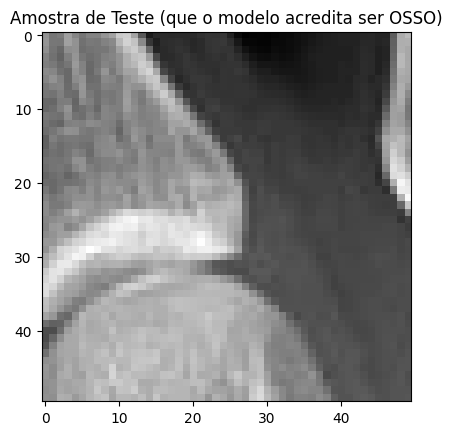

In [42]:
print(f"Pistas da amostra de teste: Brilho Médio={test_mean:.2f}, Contraste={test_std:.2f}")
if prediction[0] == 1:
    print("Veredito do Modelo: 'Com 99% de certeza, isso é um OSSO.'")
else:
    print("Veredito do Modelo: 'Com 99% de certeza, isso é um FUNDO.'")

# Vamos ver a amostra de teste
plt.imshow(test_patch, cmap='gray')
plt.title("Amostra de Teste (que o modelo acredita ser OSSO)")
plt.show()